# Chicago Food Inspections Analysis
### A case study on cleaning up and exploring violations given to food establishments in the windy city.
##### By: Elena Lawando
##### Date Written: 09/07/2024

This case study was performed following the six step data analysis process: ask, prepare, process, analyze, share, and act.

## 1. Ask
#### Background:
The City of Chicago has a public data portal that includes a dataset on health inspections for food establishments. These inspections are conducted by the Chicago Department of Public Health's Food Protection Program. After the inspection, the results are inputted into the database. This database is reviewed by an IL Licensed Environmental Health Practitioner (LEHP) and updated daily. 

#### Task: 
Analyze data on Chicago's food inspections to identify patterns and trends on food establishments' compliance with health regulations set forth by the city. The main objective is to assess common violations based on the location, type, frequency, and outcomes of the inspections. This analysis will provide implementable findings that can improve operations and reduce violations to bring food establishments in the area to a higher health standard.

Key deliverables: 
1. Determine key statistics on inspection frequency and risk type.
2. Compare inspection results by areas and facility types.
3. Identify top violations and inspection types.
4. Recommend strategies to improve health compliance.
    
## 2. Prepare
#### Datasource:
Food Inspections Data made available through the [City of Chicago](https://data.cityofchicago.org/Health-Human-Services/Food-Inspections/4ijn-s7e5/about_data).

#### Data Description:
This dataset contains information about food inspections conducted in Chicago, IL. The data recorded includes the inspection number, business's legal name (DBA name), business's public name (AKA name), license number, facility type, risk (which determines the frequency of inspections), business  information, inspection date, inspection type, results, and violations (including inspector comments). This data was collected from January 04, 2010 through August 29, 2024. 

#### Organization: 
The data is a wide format CSV file, with unique inspection numbers for each row. 

#### Data Limitations:
The data comes with a disclaimer indicating this data may have duplicate entries, and that food inspection procedures were changed on 07.01.2018. This data is also missing values for some of the location information. Additionally, this data has a few records of inspections from outside of Chicago, IL. 

#### Install and Load Relevant Packages:
The packages used for this analysis include tidyverse, janitor, and skimr.

In [1]:
#load packages
library(tidyverse)
library(janitor)
library(skimr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘janitor’




The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




#### Creating Dataframes:
The first thing to do is create a dataframe called food_inspections and glimpse the dataframe.

In [2]:
#create chicago food inspections df
food_inspections <- read.csv("/kaggle/input/food-inspections-chicago/Food_Inspections_20240904.csv")
#take a look at the data
glimpse(food_inspections)

Rows: 277,961
Columns: 17
$ Inspection.ID   <int> 2601895, 2600874, 2600871, 2600845, 2600840, 2600796, …
$ DBA.Name        <chr> "PINCHED", "J'S DELI GROCERY & GRILL, INC.", "WEST END…
$ AKA.Name        <chr> "PINCHED", "J'S DELI GROCERY & GRILL", "WEST END TATA'…
$ License..       <int> 2615889, 2694034, 1948046, 2791335, 2929007, 2957208, …
$ Facility.Type   <chr> "Restaurant", "", "Restaurant", "Restaurant", "Restaur…
$ Risk            <chr> "Risk 1 (High)", "Risk 2 (Medium)", "Risk 1 (High)", "…
$ Address         <chr> "443 E ILLINOIS ST ", "51 E 51ST ST ", "3019 W 111TH S…
$ City            <chr> "CHICAGO", "CHICAGO", "CHICAGO", "CHICAGO", "CHICAGO",…
$ State           <chr> "IL", "IL", "IL", "IL", "IL", "IL", "IL", "IL", "IL", …
$ Zip             <int> 60611, 60615, 60655, 60628, 60652, 60611, 60657, 60617…
$ Inspection.Date <chr> "08/29/2024", "08/28/2024", "08/28/2024", "08/28/2024"…
$ Inspection.Type <chr> "Canvass Re-Inspection", "Canvass", "Non-Inspection", …
$ Results     

A second dataframe is also needed for analyzing violations, because the violations prior to 07.01.2018 are different than the violations under the new procedures. The dataframe created will be called food_inspections_new and will include only data after 07.01.2018.

In [3]:
# Convert the date column to Date type if it's not already
food_inspections$Inspection.Date <- as.Date(food_inspections$Inspection.Date, format = "%m/%d/%Y")
#filter the data to include only records from 07/01/2018 and onwards
food_inspections_new <- food_inspections %>%
  filter(Inspection.Date >= as.Date("2018-07-01"))
#glimpse the data
glimpse(food_inspections_new)

Rows: 105,083
Columns: 17
$ Inspection.ID   <int> 2601895, 2600874, 2600871, 2600845, 2600840, 2600796, …
$ DBA.Name        <chr> "PINCHED", "J'S DELI GROCERY & GRILL, INC.", "WEST END…
$ AKA.Name        <chr> "PINCHED", "J'S DELI GROCERY & GRILL", "WEST END TATA'…
$ License..       <int> 2615889, 2694034, 1948046, 2791335, 2929007, 2957208, …
$ Facility.Type   <chr> "Restaurant", "", "Restaurant", "Restaurant", "Restaur…
$ Risk            <chr> "Risk 1 (High)", "Risk 2 (Medium)", "Risk 1 (High)", "…
$ Address         <chr> "443 E ILLINOIS ST ", "51 E 51ST ST ", "3019 W 111TH S…
$ City            <chr> "CHICAGO", "CHICAGO", "CHICAGO", "CHICAGO", "CHICAGO",…
$ State           <chr> "IL", "IL", "IL", "IL", "IL", "IL", "IL", "IL", "IL", …
$ Zip             <int> 60611, 60615, 60655, 60628, 60652, 60611, 60657, 60617…
$ Inspection.Date <date> 2024-08-29, 2024-08-28, 2024-08-28, 2024-08-28, 2024-…
$ Inspection.Type <chr> "Canvass Re-Inspection", "Canvass", "Non-Inspection", …
$ Results     

## 3. Process
#### Checking and Cleaning the Data:
The dataframe, food_inspections, needs to be cleaned. This will be done by ensuring there are no duplicate inspections listed, and the column names are uniform.

First, the data is cleaned using the clean_names function, and the cleaned column names are viewed using the colnames() function.

In [4]:
#clean column names
food_inspections <- clean_names(food_inspections)
#view cleaned column names
colnames(food_inspections)

[1] "inspection_id"   "dba_name"        "aka_name"        "license"        
 [5] "facility_type"   "risk"            "address"         "city"           
 [9] "state"           "zip"             "inspection_date" "inspection_type"
[13] "results"         "violations"      "latitude"        "longitude"      
[17] "location"

To verify there are no duplicate inspections recorded the following code is used.

In [5]:
#check for duplicates in the column 'inspection_id'
duplicate_inspection_id <- food_inspections$inspection_id[duplicated(food_inspections$inspection_id)]
colnames(duplicate_inspection_id)

NULL

Since nothing was returned this indicates there are no duplicates listed. This can be further validated by making sure the number of unique observations in the inspection_id column match the total number of observations in the dataframe. This is done using the nrow() and n_distinct() functions. 

In [6]:
#total observations using nrow 
nrow(food_inspections)

#unique observations in column n_distinct
n_distinct(food_inspections$inspection_id)

[1] 277961

[1] 277961

The outputs are both 277961, therefore this is the amount of inspections that are recorded from 01.04.2010 through 08.29.2024.

Next, the second dataframe, food_inspections_new, needs to be cleaned using the clean_names() function. 

In [7]:
#clean column names
food_inspections_new <- clean_names(food_inspections_new)
#view cleaned column names
colnames(food_inspections_new)

[1] "inspection_id"   "dba_name"        "aka_name"        "license"        
 [5] "facility_type"   "risk"            "address"         "city"           
 [9] "state"           "zip"             "inspection_date" "inspection_type"
[13] "results"         "violations"      "latitude"        "longitude"      
[17] "location"

Now the dataframe, food_inspections_new, needs to be verified as only having dates from after 07.01.2018. This is done by getting the min and max of the dates inspection_date column. 

In [8]:
#return the oldest date
min(food_inspections_new$inspection_date, na.rm = TRUE)

#return the newest date
max(food_inspections_new$inspection_date, na.rm = TRUE)

[1] "2018-07-03"

[1] "2024-08-29"

The returned dates are 07.03.2018 and 08.29.2024 verifying that the dataframe food_inspections_new only includes data from after the date specified. 

## 4. Analyze
The data will be analyzed to reveal some important statistics.

#### How many inspections are listed for this dataset?
When using nrow() the output given was 277961 total inspections from 01.04.2010 to 08.29.2024. For the data in the second dataframe the output using nrow() is 105083 total inspections from 07.03.2018 to 08.29.2024.

In [9]:
#unique observations to find out how many inspections were done
nrow(food_inspections_new)

[1] 105083

#### How many food establishments were visited?
In order to determine how many food establishments were visited we must first take into consideration that some places investigated will have the same business name and others may be located in the same building. Therefore, to find out this information there will need to be a unique identifier column created into the dataframes. This is done using paste0() to copy values from the "dba_name" column and the "location" column into a new column named "identifier". 


In [10]:
#paste together two columns into a new one
food_inspections$identifier <- paste0(food_inspections$dba_name, food_inspections$location)
#check column names
colnames(food_inspections)
#glimpse the data
glimpse(food_inspections)

[1] "inspection_id"   "dba_name"        "aka_name"        "license"        
 [5] "facility_type"   "risk"            "address"         "city"           
 [9] "state"           "zip"             "inspection_date" "inspection_type"
[13] "results"         "violations"      "latitude"        "longitude"      
[17] "location"        "identifier"

Rows: 277,961
Columns: 18
$ inspection_id   <int> 2601895, 2600874, 2600871, 2600845, 2600840, 2600796, …
$ dba_name        <chr> "PINCHED", "J'S DELI GROCERY & GRILL, INC.", "WEST END…
$ aka_name        <chr> "PINCHED", "J'S DELI GROCERY & GRILL", "WEST END TATA'…
$ license         <int> 2615889, 2694034, 1948046, 2791335, 2929007, 2957208, …
$ facility_type   <chr> "Restaurant", "", "Restaurant", "Restaurant", "Restaur…
$ risk            <chr> "Risk 1 (High)", "Risk 2 (Medium)", "Risk 1 (High)", "…
$ address         <chr> "443 E ILLINOIS ST ", "51 E 51ST ST ", "3019 W 111TH S…
$ city            <chr> "CHICAGO", "CHICAGO", "CHICAGO", "CHICAGO", "CHICAGO",…
$ state           <chr> "IL", "IL", "IL", "IL", "IL", "IL", "IL", "IL", "IL", …
$ zip             <int> 60611, 60615, 60655, 60628, 60652, 60611, 60657, 60617…
$ inspection_date <date> 2024-08-29, 2024-08-28, 2024-08-28, 2024-08-28, 2024-…
$ inspection_type <chr> "Canvass Re-Inspection", "Canvass", "Non-Inspection", …
$ results     

In [11]:
#paste together two columns into a new one
food_inspections_new$identifier <- paste0(food_inspections_new$dba_name, food_inspections_new$location)
#check column names
colnames(food_inspections_new)
#glimpse the data
glimpse(food_inspections_new)

[1] "inspection_id"   "dba_name"        "aka_name"        "license"        
 [5] "facility_type"   "risk"            "address"         "city"           
 [9] "state"           "zip"             "inspection_date" "inspection_type"
[13] "results"         "violations"      "latitude"        "longitude"      
[17] "location"        "identifier"

Rows: 105,083
Columns: 18
$ inspection_id   <int> 2601895, 2600874, 2600871, 2600845, 2600840, 2600796, …
$ dba_name        <chr> "PINCHED", "J'S DELI GROCERY & GRILL, INC.", "WEST END…
$ aka_name        <chr> "PINCHED", "J'S DELI GROCERY & GRILL", "WEST END TATA'…
$ license         <int> 2615889, 2694034, 1948046, 2791335, 2929007, 2957208, …
$ facility_type   <chr> "Restaurant", "", "Restaurant", "Restaurant", "Restaur…
$ risk            <chr> "Risk 1 (High)", "Risk 2 (Medium)", "Risk 1 (High)", "…
$ address         <chr> "443 E ILLINOIS ST ", "51 E 51ST ST ", "3019 W 111TH S…
$ city            <chr> "CHICAGO", "CHICAGO", "CHICAGO", "CHICAGO", "CHICAGO",…
$ state           <chr> "IL", "IL", "IL", "IL", "IL", "IL", "IL", "IL", "IL", …
$ zip             <int> 60611, 60615, 60655, 60628, 60652, 60611, 60657, 60617…
$ inspection_date <date> 2024-08-29, 2024-08-28, 2024-08-28, 2024-08-28, 2024-…
$ inspection_type <chr> "Canvass Re-Inspection", "Canvass", "Non-Inspection", …
$ results     

Using n_distinct() for the identifier column the amount of food establishments can be found.

In [12]:
#unique observations in column
#for 2010 to 2024
n_distinct(food_inspections$identifier)
#for 2018 to 2024
n_distinct(food_inspections_new$identifier)

[1] 37758

[1] 21156

From this it is determined that there were 37758 food establishments inspected from 01.04.2010 to 08.29.2024, and 21156 food establishments from 07.03.2018 to 08.29.2024.

#### What are the percentages of risk types based on inspections (2010 to 2024)?
The risk types are an indicator as to how often inspections will take place with risk 1 being the highest, and risk 3 being the lowest. The percentages of each type of risk in relation to the number of inspections can be determined  using a summary table.


In [13]:
#create a summary table to determine percentage of risk types
food_inspections %>%
    group_by(risk) %>%
    summarize(percent = 100 * n()/nrow(food_inspections))

risk,percent
<chr>,<dbl>
,0.02986030
All,0.01978695
Risk 1 (High),73.63802836
Risk 2 (Medium),18.21514529
Risk 3 (Low),8.09717910


Of all the inspections 73.64% were Risk 1 (High), 18.22% were Risk 2 (Medium), and 8.10% were risk 3 (Low).

#### What are the percentages of inspection results (2010-2024)?
To determine the percentages of the results recorded another summary table can be created.

In [14]:
#create a summary table to determine percents of results
food_inspections %>%
    group_by(results) %>%
    summarize(percent = 100 * n()/nrow(food_inspections))

results,percent
<chr>,<dbl>
Business Not Located,0.03201888
Fail,19.51424840
No Entry,4.08942262
Not Ready,1.29766406
Out of Business,8.37707448
Pass,51.48024363
Pass w/ Conditions,15.20932793


Of the inspections recorded 51.48% passed, 15.21% passed with conditions, 19.51% failed, 4.09% were not allowed entry, 8.38% were out of business, and 0.03% were not located. 

#### Which area of Chicago has the most amount of inspections (2010-2024)?
In order to determine which zip code in Chicago has the most amount of inspections first a summary dataframe needs to be created of the counts of inspections per zip code. From this a maximum can be returned.

In [15]:
#create a summary count of zip codes
zipsummary <- food_inspections %>%
    count(zip)
#return the zip code with max amount of inspections
max_zip <- zipsummary %>%
    filter(n == max(n))
#print results
print(max_zip)

    zip     n
1 60614 10316


The zip code with the most inspections is 60614 with 10316 inspections recorded. 

#### Which violations are most common (2018-2024)?
To analyze violations the dataframe "food_inspections_new" that includes data from 2018 to 2024 will be analyzed based on the new violations set forth by the City of Chicago in 2018. Since all the data on violations are in one column called "violations", new columns indicating each violation type (1-63 which can be found [here](https://www.chicago.gov/city/en/depts/cdph/provdrs/food_safety/svcs/understand_healthcoderequirementsforfoodestablishments.html)) will be created. If the violation is indicated it will be counted in the corresponding column.

In [16]:
#create 63 new columns for each of the violations
for (i in 1:63) {
  #cconstruct the pattern that will be searched for -- in this case it is the violation number and a '.'
  pattern <- paste0(i, "\\.")
  
  #create a new column with the count of occurrences of the pattern in the violations column
  food_inspections_new[[as.character(i)]] <- str_count(food_inspections_new$violations, pattern)
}

#view the dataframe
head(food_inspections_new)

,inspection_id,dba_name,aka_name,license,facility_type,risk,address,city,state,zip,⋯,54,55,56,57,58,59,60,61,62,63
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2601895,PINCHED,PINCHED,2615889,Restaurant,Risk 1 (High),443 E ILLINOIS ST,CHICAGO,IL,60611,⋯,0,0,1,0,1,0,0,0,0,0
2,2600874,"J'S DELI GROCERY & GRILL, INC.",J'S DELI GROCERY & GRILL,2694034,,Risk 2 (Medium),51 E 51ST ST,CHICAGO,IL,60615,⋯,0,0,0,0,0,0,0,0,0,0
3,2600871,WEST END TATA'S PIZZA,WEST END TATA'S PIZZA,1948046,Restaurant,Risk 1 (High),3019 W 111TH ST,CHICAGO,IL,60655,⋯,0,0,0,0,0,0,0,0,0,0
4,2600845,"ONE STOP JAMAICA JERK RESTAURANT,LLC",PARK ISLAND JERK,2791335,Restaurant,Risk 1 (High),319 W 95TH ST,CHICAGO,IL,60628,⋯,0,0,0,0,0,0,0,0,0,0
5,2600840,MOUNT CAROL'S FROZEN TREATS LLC,MOUNT CAROL'S FROZEN TREATS LLC,2929007,Restaurant,Risk 1 (High),2701 W 79TH ST,CHICAGO,IL,60652,⋯,1,0,0,1,1,0,0,0,0,0
6,2600796,HOTEL RIU PLAZA CHICAGO,RIU PLAZA CHICAGO,2957208,Restaurant,Risk 3 (Low),150 E ONTARIO ST,CHICAGO,IL,60611,⋯,0,0,0,0,0,0,0,0,0,0


Now that all 63 violations are accounted for, the totals can be found of each violation in order to determine which violations are most common.

In [17]:
#calculate the total count for each of the 63 columns
totals <- colSums(food_inspections_new[, as.character(1:63)])
#convert the totals to a readable dataframe
totals <- data.frame(violation_number = names(totals), total_count = totals)

To view these totals from highest to lowest the dataframe created can be rearranged using the arrange() function.

In [18]:
#arrange totals in descending order based on total_count
totals_ordered <- totals %>% arrange(desc(total_count))

# View the ordered data frame
print(totals_ordered)

   violation_number total_count
5                 5      126808
1                 1       71101
55               55       65797
7                 7       56667
3                 3       50161
8                 8       46216
2                 2       40846
9                 9       37878
6                 6       37763
10               10       31070
47               47       30787
49               49       24592
51               51       23432
56               56       19664
38               38       17884
4                 4       17750
58               58       16984
53               53       14751
57               57       12792
37               37       10864
48               48        8819
39               39        8551
36               36        8286
41               41        7539
25               25        7206
23               23        6705
16               16        6555
60               60        6417
22               22        5543
12               12        5305
54      

From this arranged dataframe of the totals based on violations it is known that the top 5 violations cited are numbers 5, 1, 55, 7, and 3. These violations are: 
* Violation 5 = "Procedures for responding to vomiting and diarrheal events"
* Violation 1 = "Person in charge present, demonstrates knowledge, and performs duties"
* Violation 55 = "Physical facilities installed, maintained & clean"
* Violation 7 = "No discharge from eyes, nose, and mouth"
* Violation 3 = "Management, food employee and conditional employee; knowledge, responsibilities and reporting"
    
Additionally, it is known that the least cited violations are numbers 34, 31, 26, 42, and 27. These violations are: 
* Violation 34 = "Plant food properly cooked for hot holding"
* Violation 31 = "Water & ice from approved source"
* Violation 26 = "Pasteurized foods used; prohibited foods not offered"
* Violation 42 = "Washing fruits & vegetables"
* Violation 27 = "Food additives: approved and properly used"

## 5. Share
This data can be visualized in different charts using ggplot. 

#### Food Establishments and Inspection Results 


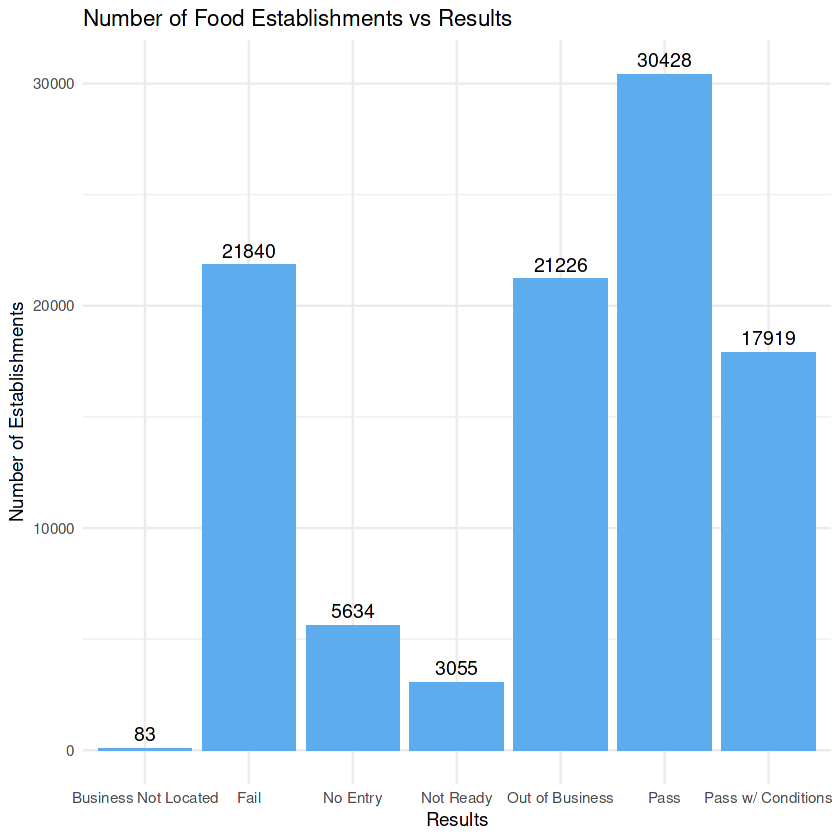

In [19]:
#count distinct places per result
food_inspections_summary <- food_inspections %>%
  group_by(results) %>%
  summarise(distinct_identifier = n_distinct(identifier))

#create a bar chart
ggplot(food_inspections_summary, aes(x = results, y = distinct_identifier)) +
  geom_bar(stat = "identity", fill = "steelblue2") +
#add bar labels above for y values  
  geom_text(aes(label = distinct_identifier),
           vjust = -0.5,
           size = 4) +
  labs(title = "Number of Food Establishments vs Results", 
       x = "Results", 
       y = "Number of Establishments") +
  theme_minimal()

#### Food Establishments and Risk Type

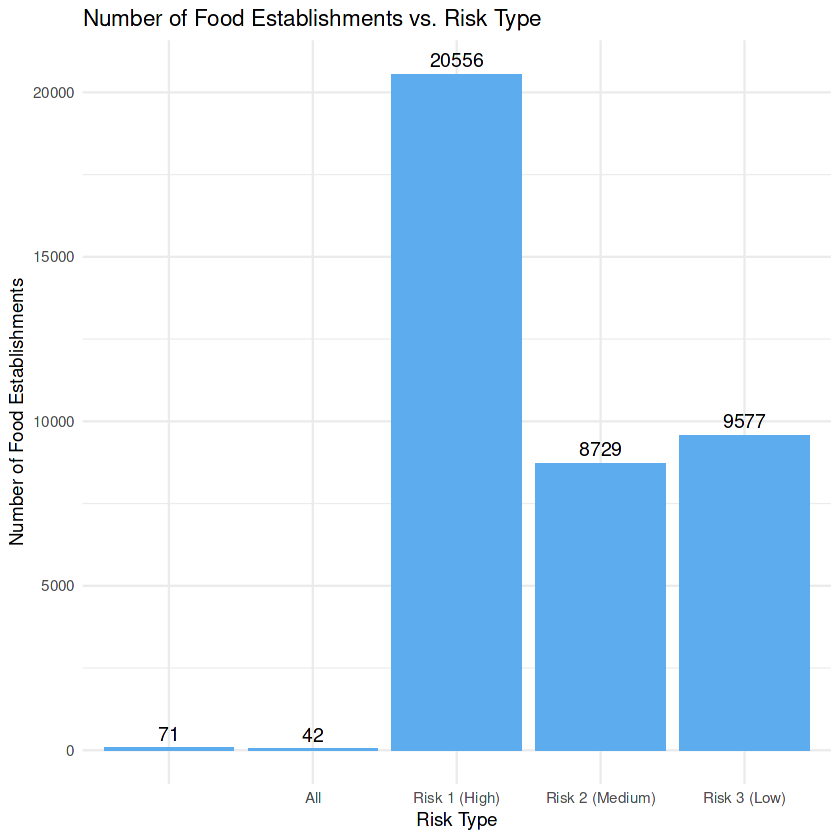

In [20]:
#distinct count of places per risk
food_inspections_summary2 <- food_inspections %>%
  group_by(risk) %>%
  summarise(distinct_identifier2 = n_distinct(identifier))
#make bar chart
ggplot(food_inspections_summary2, aes(x = risk, y = distinct_identifier2)) +
    geom_bar(stat = "identity", fill = "steelblue2") +
    geom_text(aes(label = distinct_identifier2),
             vjust = -0.5,
             size = 4) +
labs(title = "Number of Food Establishments vs. Risk Type",
    x = "Risk Type",
    y = "Number of Food Establishments") +
theme_minimal()

#### Inspections by Zip Code

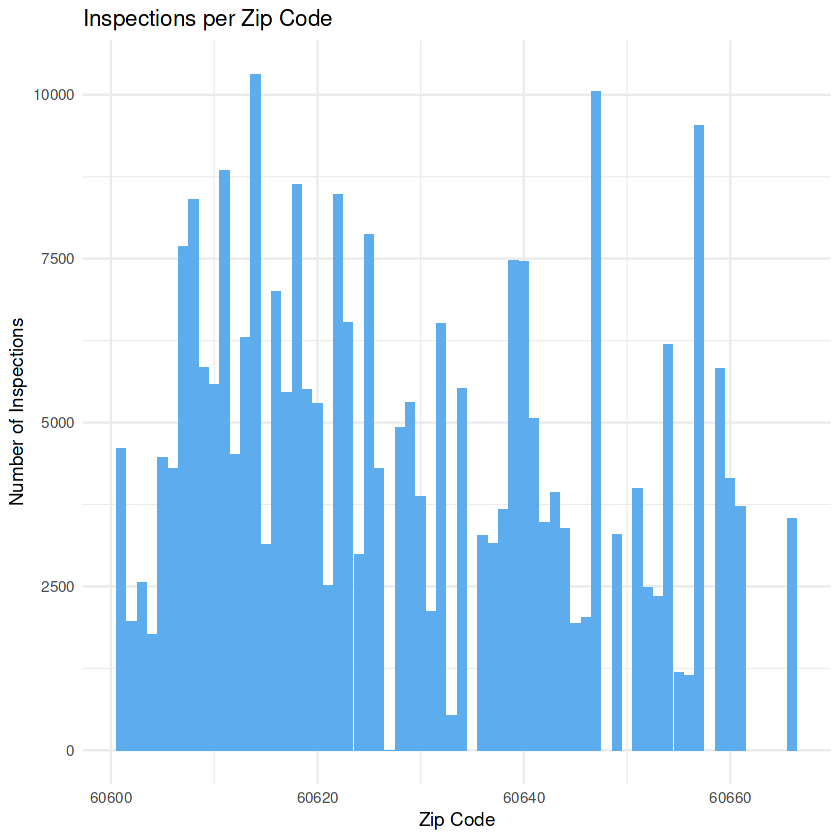

In [21]:
#filter for only chicago zipcodes
filteredzip <- food_inspections %>%
    filter(zip >= 60600 & zip <= 60700)
#make bar chart
ggplot(filteredzip, aes(x = zip)) +
    geom_bar(fill = "steelblue2") +
labs(title = "Inspections per Zip Code",
     x = "Zip Code",
     y = "Number of Inspections") +
theme_minimal()

#### Inspections per Year

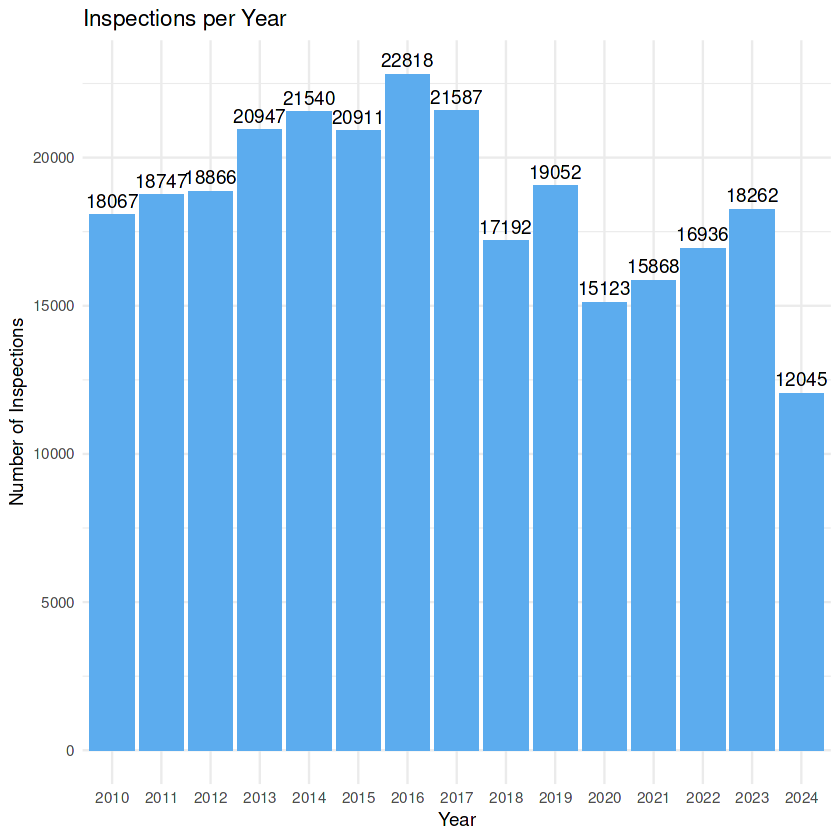

In [22]:
#insert a years column from the inspection dates
food_inspections$year <- format(food_inspections$inspection_date, "%Y")
#create bar chart
ggplot(food_inspections, aes(x = year)) +
    geom_bar(fill = "steelblue2") +
    geom_text(stat = "count", aes(label = after_stat(count)), 
             vjust = -0.5) +
labs(title = "Inspections per Year",
     x = "Year",
     y = "Number of Inspections") +
theme_minimal()

#### Violations Count

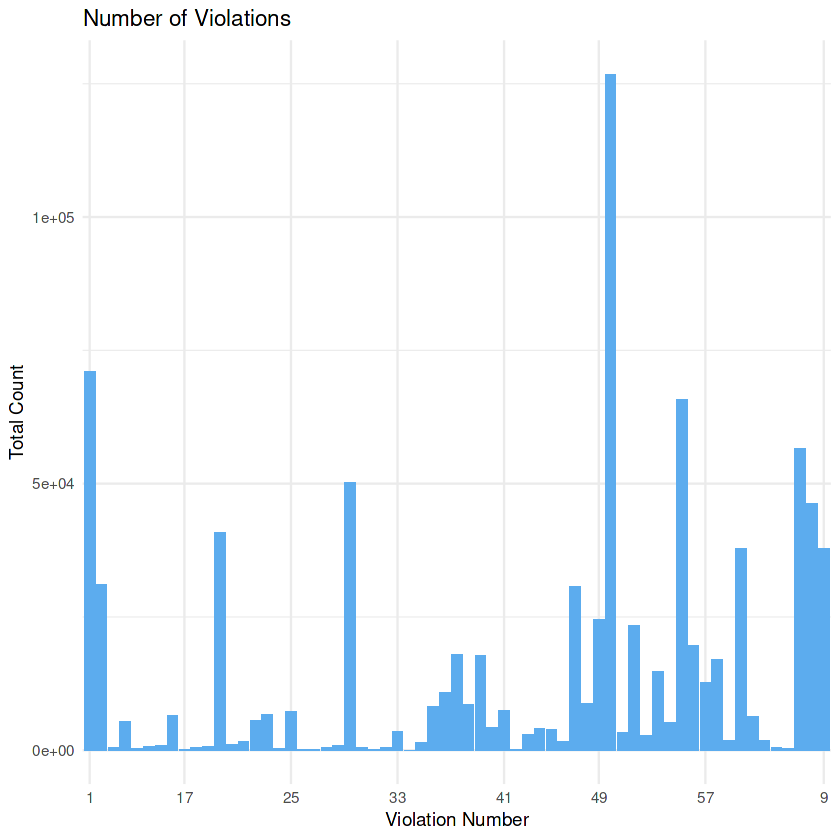

In [23]:
#make bar chart
ggplot(totals, aes(x = violation_number, y = total_count)) +
    geom_bar(stat = "identity", fill = "steelblue2") +
labs(title = "Number of Violations", 
     x = "Violation Number", 
     y = "Total Count") +
theme_minimal() +
#reduce the number of x labels
scale_x_discrete(breaks = totals$violation_number[seq(1, length(totals$violation_number), by = 8)])

## 6. Act
#### Key Insights Summary:
* The food inspections recorded in this dataset take place from 01.04.2010 through 08.29.2024.

* The amount of inspections recorded are 277,961.

* The amount of food establishments inspected by the City of Chicago from are 37,758.

* The zip code with the highest amount of inspections is 60614.

* The majority of food establishments pass, this is evident by the 51.48% pass rate and 15.21% pass rate with conditions, while 19.51% are failed inspections.

* The top 5 violations cited from 2018 onward are 5, 1, 55, 7, and 3.

#### Recommendations:
Based on this analysis, I recommend the city take into consideration creating a citywide health training that is available to all food establishments. This training should outline the proper food handling procedures, but place an emphasis on expectations from food service workers. This would help reduce the amount of violations found in food Establishments. Regular compliance checks should be incorporated to maintain high standards over time.

#### Interactive Dashboard Link:
As a supplement to this analysis I have created an interactive tableau dashboard which can be found [here](https://public.tableau.com/views/ChicagoFoodInspectionsDashboard/Dashboard4?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link). This dashboard also allows a user to search for specific restaurants and view specific violations by inspection dates. 